You are given the following dataset, containing closing stock prices for a number of large publicly traded companies. Using this, find the Pearson correlation coefficient for the returns of each pair of equities, and plot a correlation matrix.

Solution will be written in Python for premium users.



You can view the solutions to your past questions by logging into your account. A solution for this question will appear in your account by tomorrow (though, we'd recommend trying to solve on your own before viewing).



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import corrcoef
from matplotlib import pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/stock_prices_ddi.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Close,Symbol
0,0,2018-01-02,172.259995,AAPL
1,1,2018-01-03,172.229996,AAPL
2,2,2018-01-04,173.029999,AAPL
3,3,2018-01-05,175.000000,AAPL
4,4,2018-01-08,174.350006,AAPL


In [4]:
df.dtypes

Unnamed: 0      int64
Date           object
Close         float64
Symbol         object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 4 columns):
Unnamed: 0    3352 non-null int64
Date          3352 non-null object
Close         3352 non-null float64
Symbol        3352 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 104.9+ KB


In [6]:
df['Symbol'].unique()

array(['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE'],
      dtype=object)

In [7]:
symbol_dummies = pd.get_dummies(df['Symbol']) 
symbol_dummies.sum()

for col in symbol_dummies.columns:
    symbol_dummies[col] = symbol_dummies[col]*df['Close']
    
df = pd.concat([df, symbol_dummies], axis=1)
df.head()

,Unnamed: 0,Date,Close,Symbol,AAL,AAPL,AMZN,F,FB,GE,GOOGL,TWTR
0,0,2018-01-02,172.259995,AAPL,0.0,172.259995,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-01-03,172.229996,AAPL,0.0,172.229996,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-01-04,173.029999,AAPL,0.0,173.029999,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-01-05,175.000000,AAPL,0.0,175.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-01-08,174.350006,AAPL,0.0,174.350006,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
close_df = df.groupby('Date').sum()

In [14]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'Symbol', 'AAL', 'AAPL', 'AMZN', 'F',
       'FB', 'GE', 'GOOGL', 'TWTR'],
      dtype='object')

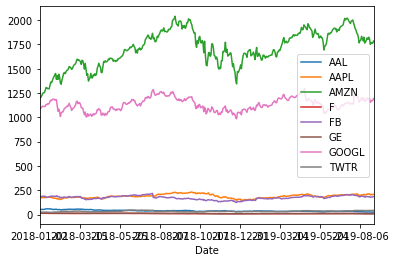

In [15]:
close_df[['AAL', 'AAPL', 'AMZN', 'F',
       'FB', 'GE', 'GOOGL', 'TWTR']].plot.line()

In [16]:
corr = close_df[['AAL', 'AAPL', 'AMZN', 'F',
       'FB', 'GE', 'GOOGL', 'TWTR']].corr()

corr.style.background_gradient(cmap='coolwarm')

,AAL,AAPL,AMZN,F,FB,GE,GOOGL,TWTR
AAL,1,-0.299639,-0.619878,0.710888,0.124719,0.792519,-0.195775,-0.414155
AAPL,-0.299639,1,0.74483,-0.0874566,0.279782,-0.009787,0.591362,0.265705
AMZN,-0.619878,0.74483,1,-0.352055,0.290792,-0.380032,0.621411,0.505647
F,0.710888,-0.0874566,-0.352055,1,0.583143,0.812562,-0.067747,0.0571298
FB,0.124719,0.279782,0.290792,0.583143,1,0.47587,0.504881,0.544802
GE,0.792519,-0.009787,-0.380032,0.812562,0.47587,1,0.0509985,-0.242258
GOOGL,-0.195775,0.591362,0.621411,-0.067747,0.504881,0.0509985,1,0.349694
TWTR,-0.414155,0.265705,0.505647,0.0571298,0.544802,-0.242258,0.349694,1


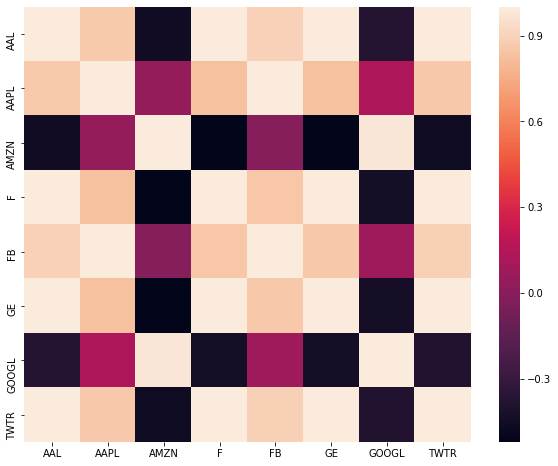

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr)